In [5]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_test.shape

(10000,)

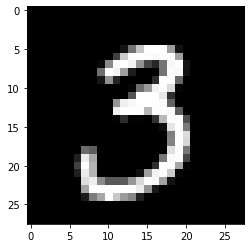

In [7]:
plt.imshow(X_test[90], cmap="gray")

In [8]:
y_test[90]

3

In [9]:
X = X_test.reshape(-1, 28*28)
y = y_test

In [12]:
X.shape

(10000, 784)

In [18]:
# Step 1 - Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
X_ = sc.fit_transform(X)

In [16]:
X_.shape

(10000, 784)

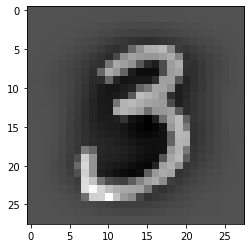

In [17]:
plt.imshow(X_[90].reshape(28,28) , cmap="gray")

## Sklearn PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)

In [22]:
Z_pca = pca.fit_transform(X_)

In [23]:
Z_pca.shape

(10000, 2)

In [24]:
Z_pca

array([[-5.4583234 ,  6.41303989],
       [ 2.80450387, -8.02883534],
       [-7.41125491, -3.86407295],
       ...,
       [-5.00433691,  1.15376327],
       [-1.42078496, -4.41968667],
       [13.14265616, -4.26419773]])

In [26]:
pca.explained_variance_

array([41.39893397, 28.35105756])

## Custom PCA

In [27]:
import numpy as np

In [28]:
# Step 2 - Computer Covar matrix

In [29]:
covar = np.dot(X_.T, X_)

In [30]:
covar.shape

(784, 784)

In [32]:
# Step - 3 Computer eigen vectors using SVD

In [34]:
from numpy.linalg import svd

In [36]:
U, S, V = svd(covar)

In [37]:
U.shape

(784, 784)

In [38]:
Ured = U[:, :2]

In [39]:
Ured.shape

(784, 2)

In [40]:
# Step 4 - Project of Data on New axis(Components)

In [41]:
Z = np.dot(X_, Ured)

In [42]:
Z.shape

(10000, 2)

In [45]:
Z

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

## Visualize Dataset

In [46]:
import pandas as pd

In [48]:
new_dataset = np.hstack((Z, y.reshape(-1,1)))

In [49]:
dataframe = pd.DataFrame(new_dataset , columns=["PC1", "PC2", "label"])

In [50]:
dataframe.head()

,PC1,PC2,label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


/Users/mohituniyal/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<Figure size 1080x1080 with 0 Axes>

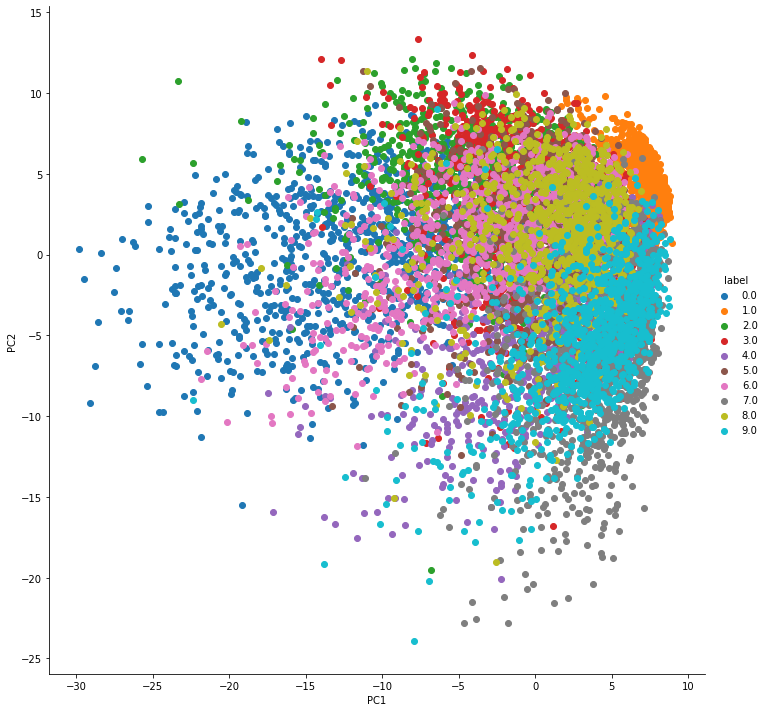

In [51]:
import seaborn as sns
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(dataframe, hue="label", height=10)
fg.map(plt.scatter, "PC1", "PC2")
fg.add_legend()
plt.show()

# PCA with 784

In [52]:
pca = PCA()

In [53]:
Z_pca= pca.fit_transform(X_)

In [54]:
Z_pca.shape

(10000, 784)

In [60]:
cum_var_exaplined = np.cumsum(pca.explained_variance_ratio_)

In [61]:
cum_var_exaplined

array([0.06196825, 0.10440571, 0.14485024, 0.17715614, 0.20470687,
       0.22879812, 0.24925102, 0.26808257, 0.28479108, 0.29996633,
       0.31468716, 0.32779648, 0.34034829, 0.35228998, 0.36373924,
       0.37468893, 0.38500726, 0.39494763, 0.4044137 , 0.41352917,
       0.42242401, 0.4310809 , 0.439552  , 0.44776835, 0.45563324,
       0.46333726, 0.47090331, 0.47823448, 0.48532264, 0.49215733,
       0.49884345, 0.5053854 , 0.51185667, 0.51807696, 0.52411842,
       0.53003733, 0.53585823, 0.54159029, 0.54724663, 0.55277341,
       0.55828517, 0.56376579, 0.56910488, 0.57430115, 0.5794262 ,
       0.58441841, 0.58939824, 0.59428976, 0.59907746, 0.60376681,
       0.6083714 , 0.61291288, 0.61737137, 0.62177213, 0.62611217,
       0.63034858, 0.63454437, 0.63868709, 0.64280317, 0.64685943,
       0.65086596, 0.65473127, 0.65854374, 0.66229743, 0.66596192,
       0.66957285, 0.67314234, 0.6766452 , 0.68011477, 0.68355655,
       0.68691319, 0.69025179, 0.69355391, 0.69682147, 0.70006

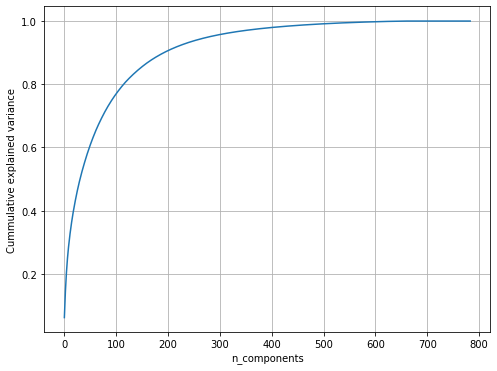

In [63]:
plt.figure(figsize=(8,6))
plt.plot(cum_var_exaplined)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cummulative explained variance")
plt.show()